In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rasterio as rio

In [35]:
#Cargar Shapefile de subcuencas del pais y seleccionar las 5 subcuencas de raea de estudio
runap = gpd.read_file("C:/Users/nicol/Desktop/PMAD/Semestre_II/ProgramacionSIG/Trabajos/ProyectoFinal/Insumos/RUNAP¨_Nov2024/runap.shp")
Szh = gpd.read_file("C:/Users/nicol/Desktop/PMAD/Semestre_II/ProgramacionSIG/Trabajos/ProyectoFinal/Insumos/Zonificacion_hidrografica_2013/Zonificacion_hidrografica_2013.shp")


<Axes: >

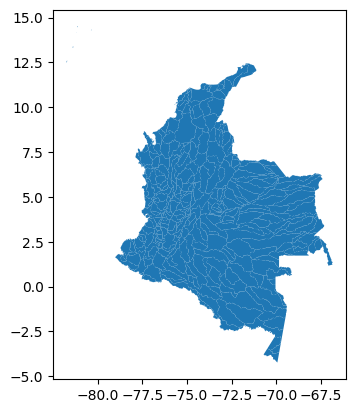

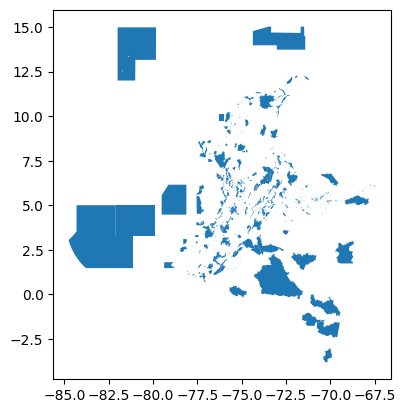

In [36]:
Szh.plot()
runap.plot()

In [37]:
runap.head(33)

,objectid,nombre,categoria,territoria,resolucion,hectareas_,escala,organizaci,fecha_act,url,...,fecha_regi,validado,hectarea_1,perimetro_,administra,id_pnn,record_id,app_id,AreHa_CT12,geometry
0,193551,Cueva de los Guácharos,Parque Nacional Natural,Territorial Andes Occidentales,"2631,2631",7142.9300,None,Parques Nacionales Naturales de Colombia,2011-07-13,https://runap.parquesnacionales.gov.co/area-pr...,...,2011-07-13,Si,7132.944353,None,PNNC,6,1355,1,NaN,"POLYGON ((-76.09835 1.64106, -76.09839 1.64098..."
1,193552,Nukak,Reserva Natural,Territorial Amazonia,122,874890.5000,None,Parques Nacionales Naturales de Colombia,2012-03-26,https://runap.parquesnacionales.gov.co/area-pr...,...,2012-03-26,Si,874890.507942,None,PNNC,8,2293,1,NaN,"POLYGON ((-72.06811 2.37303, -72.06797 2.37296..."
2,193553,Dinaboy,Reserva Natural de la Sociedad Civil,None,0308,212.2469,None,Parques Nacionales Naturales de Colombia,2011-07-21,https://runap.parquesnacionales.gov.co/area-pr...,...,2011-07-21,Si,212.246975,None,PNNC,9,2359,1,NaN,"POLYGON ((-76.70859 3.75344, -76.70853 3.75332..."
3,193554,Los Nevados,Parque Nacional Natural,Territorial Andes Occidentales,148,61376.2200,None,Parques Nacionales Naturales de Colombia,2011-07-13,https://runap.parquesnacionales.gov.co/area-pr...,...,2011-07-13,Si,61376.227768,None,PNNC,11,2708,1,NaN,"POLYGON ((-75.39738 4.97693, -75.39737 4.97692..."
4,193555,Las Bromelias,Reserva Natural de la Sociedad Civil,None,0036,9.6500,None,Parques Nacionales Naturales de Colombia,2011-07-26,https://runap.parquesnacionales.gov.co/area-pr...,...,2011-07-26,Si,9.212285,None,PNNC,12,166,1,NaN,"POLYGON ((-76.64334 2.41416, -76.64299 2.41439..."
5,193556,Villa Paz,Reserva Natural de la Sociedad Civil,None,0060,36.7000,None,Parques Nacionales Naturales de Colombia,2016-08-11,https://runap.parquesnacionales.gov.co/area-pr...,...,2016-08-11,Si,36.418260,None,PNNC,14,1151,1,NaN,"POLYGON ((-73.95515 4.54437, -73.95332 4.54434..."
6,193557,La Gaviota,Reserva Natural de la Sociedad Civil,None,0044,12.5100,None,Parques Nacionales Naturales de Colombia,2011-07-26,https://runap.parquesnacionales.gov.co/area-pr...,...,2011-07-26,Si,10.947593,None,PNNC,16,165,1,NaN,"POLYGON ((-75.13458 5.38353, -75.13452 5.38357..."
7,193558,Los Estoraques,Área Natural Única,Territorial Andes Nororientales,135,1053.4400,None,Parques Nacionales Naturales de Colombia,2011-07-13,https://runap.parquesnacionales.gov.co/area-pr...,...,2011-07-13,Si,1053.444809,None,PNNC,17,2358,1,NaN,"POLYGON ((-73.26526 8.25577, -73.26477 8.25535..."
8,193559,Buenos Aires,Reserva Natural de la Sociedad Civil,None,0061,183.8000,None,Parques Nacionales Naturales de Colombia,2011-07-21,https://runap.parquesnacionales.gov.co/area-pr...,...,2011-07-21,Si,132.654695,None,PNNC,18,73,1,NaN,"POLYGON ((-76.17597 3.66631, -76.1747 3.66611,..."
9,193560,El Garcero,Reserva Natural de la Sociedad Civil,None,0050,586.8600,None,Parques Nacionales Naturales de Colombia,2011-07-26,https://runap.parquesnacionales.gov.co/area-pr...,...,2011-07-26,Si,374.471842,None,PNNC,19,159,1,NaN,"POLYGON ((-74.10732 9.00118, -74.11202 9.00681..."


In [38]:
Chingaza = runap[runap["nombre"].isin(["Chingaza"])]

<Axes: >

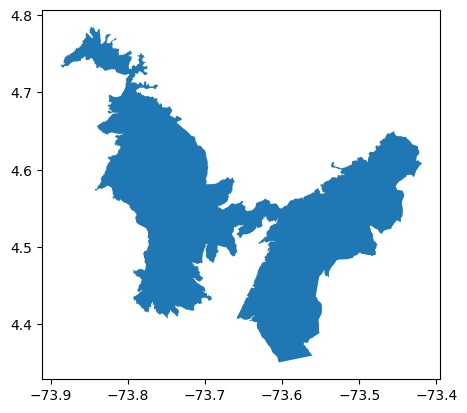

In [39]:
Chingaza.plot()

In [40]:
Chingaza.head()

,objectid,nombre,categoria,territoria,resolucion,hectareas_,escala,organizaci,fecha_act,url,...,fecha_regi,validado,hectarea_1,perimetro_,administra,id_pnn,record_id,app_id,AreHa_CT12,geometry
32,193583,Chingaza,Parque Nacional Natural,Territorial Orinoquia,"154,154",77283.267,None,Parques Nacionales Naturales de Colombia,2011-06-30,https://runap.parquesnacionales.gov.co/area-pr...,...,2011-06-30,Si,77283.274798,None,PNNC,48,2706,1,NaN,"POLYGON ((-73.84743 4.78522, -73.84741 4.78522..."


In [41]:
import rasterio.plot
import rasterio.merge
import rasterio.features

In [55]:
Orinoco = Szh[Szh["COD_AH"].isin([3])]

In [56]:
Orinoco.head()

,OBJECTID_1,COD_AH,COD_ZH,COD_SZH,NOM_AH,NOM_ZH,NOM_SZH,Shape_Leng,Shape_Area,RULEID,Area_Ha,geometry
36,37,3,37,3701,Orinoco,Arauca,Río Chítaga,3.033020,0.203615,4,248922.822458,"POLYGON ((-72.41833 7.39667, -72.41833 7.39417..."
37,38,3,37,3702,Orinoco,Arauca,Río Margua,1.322978,0.061035,4,74588.912659,"POLYGON ((-72.13302 7.18403, -72.13286 7.18377..."
39,40,3,37,3703,Orinoco,Arauca,Río Cobugón - Río Cobaría,1.844153,0.161766,4,197812.319579,"POLYGON ((-72.08424 7.04356, -72.08438 7.038, ..."
40,41,3,39,3901,Orinoco,Apure,Alto Río Apure,0.967064,0.021619,4,26411.239620,"POLYGON ((-72.13302 7.18403, -72.135 7.18375, ..."
41,42,3,35,3507,Orinoco,Meta,Río Garagoa,2.826144,0.202833,4,249104.629496,"POLYGON ((-73.21584 5.445, -73.21584 5.44042, ..."


In [57]:
AE = Orinoco[Orinoco["COD_SZH"].isin([3502, 3503, 3504, 3505, 3506])]

<Axes: >

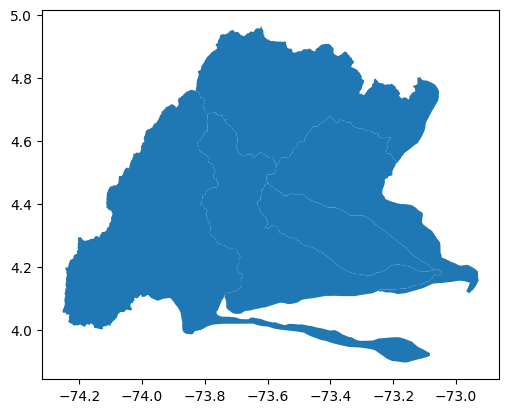

In [58]:
AE.plot()

In [59]:
AE.head()

,OBJECTID_1,COD_AH,COD_ZH,COD_SZH,NOM_AH,NOM_ZH,NOM_SZH,Shape_Leng,Shape_Area,RULEID,Area_Ha,geometry
141,142,3,35,3503,Orinoco,Meta,Río Guatiquía,2.897276,0.145049,4,178395.145453,"POLYGON ((-73.5725 4.52083, -73.5725 4.52, -73..."
142,143,3,35,3505,Orinoco,Meta,Río Humea,2.574802,0.117354,4,144246.927603,"POLYGON ((-73.19098 4.52694, -73.19276 4.52443..."
143,144,3,35,3504,Orinoco,Meta,Río Guacavía,1.426981,0.069265,4,85162.468320,"POLYGON ((-73.07257 4.19116, -73.07241 4.19032..."
144,145,3,35,3506,Orinoco,Meta,Río Guavio,2.779781,0.186549,4,229267.867683,"POLYGON ((-73.2575 4.7975, -73.2575 4.79708, -..."
146,147,3,35,3502,Orinoco,Meta,Río Guayuriba,4.243415,0.260597,4,320681.954316,"POLYGON ((-73.82917 4.7575, -73.82875 4.7575, ..."


In [61]:
#Escenarios de estres hídrico
sc1 = gpd.read_file("C:/Users/nicol/Desktop/PMAD/Semestre_II/ProgramacionSIG/Trabajos/ProyectoFinal/Insumos/Estres_hidrico/Escenarios/HUA_SC1_Dis.shp")
sc2 = gpd.read_file("C:/Users/nicol/Desktop/PMAD/Semestre_II/ProgramacionSIG/Trabajos/ProyectoFinal/Insumos/Estres_hidrico/Escenarios/HUA_SC2_Dis.shp")
sc3 = gpd.read_file("C:/Users/nicol/Desktop/PMAD/Semestre_II/ProgramacionSIG/Trabajos/ProyectoFinal/Insumos/Estres_hidrico/Escenarios/HUA_SC3_Dis.shp")
sc4 = gpd.read_file("C:/Users/nicol/Desktop/PMAD/Semestre_II/ProgramacionSIG/Trabajos/ProyectoFinal/Insumos/Estres_hidrico/Escenarios/HUA_SC4_Dis.shp")
sc5 = gpd.read_file("C:/Users/nicol/Desktop/PMAD/Semestre_II/ProgramacionSIG/Trabajos/ProyectoFinal/Insumos/Estres_hidrico/Escenarios/HUA_SC5_Dis.shp")

<Axes: >

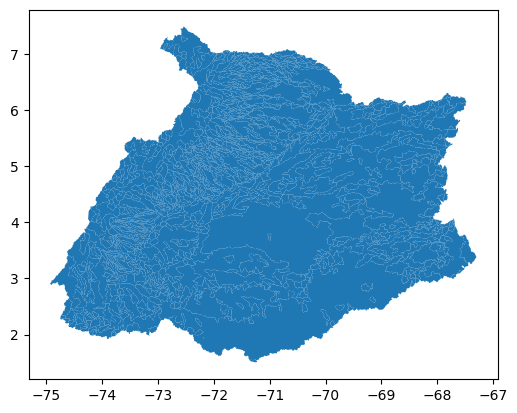

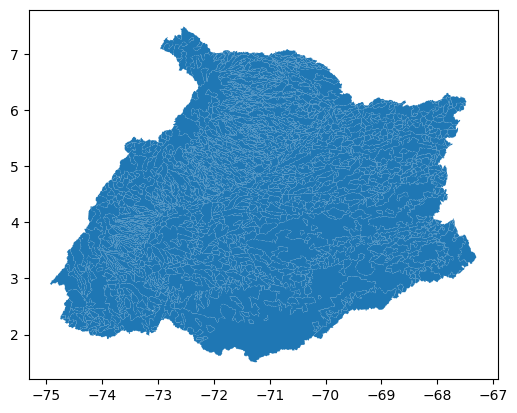

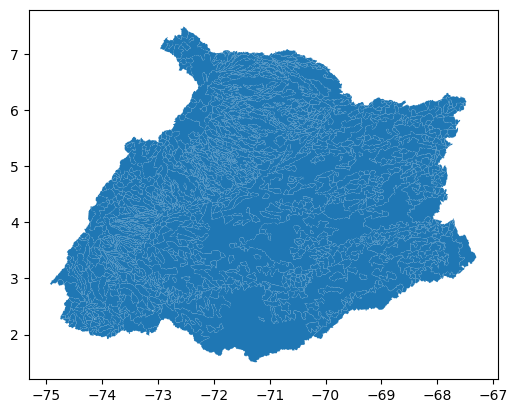

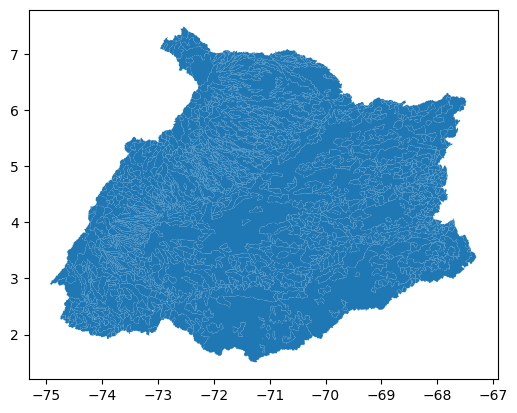

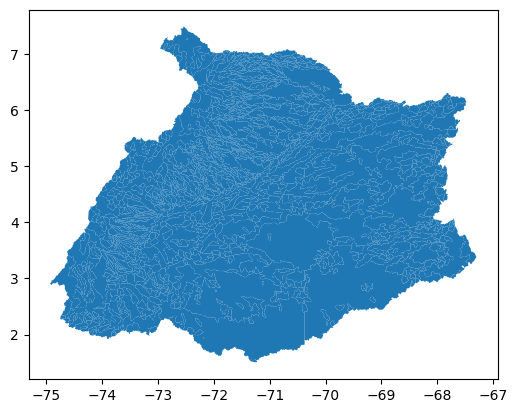

In [62]:
sc1.plot()
sc2.plot()
sc3.plot()
sc4.plot()
sc5.plot()

In [63]:
AEsc1 = gpd.clip(sc1, AE)

C:\Users\nicol\AppData\Local\Temp\ipykernel_5176\3885369896.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4686

  AEsc1 = gpd.clip(sc1, AE)


In [70]:
if AE.crs != sc1.crs:
    sc1 = sc1.to_crs(AE.crs)

In [71]:
AEsc1 = gpd.clip(sc1, AE)

<Axes: >

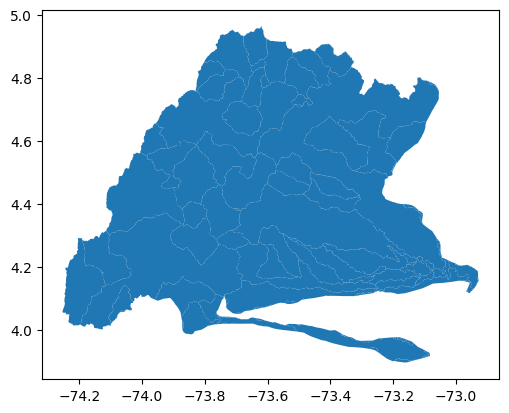

In [72]:
AEsc1.plot()

In [73]:
if AE.crs != sc2.crs:
    sc2 = sc2.to_crs(AE.crs)

AEsc2 = gpd.clip(sc2, AE)

<Axes: >

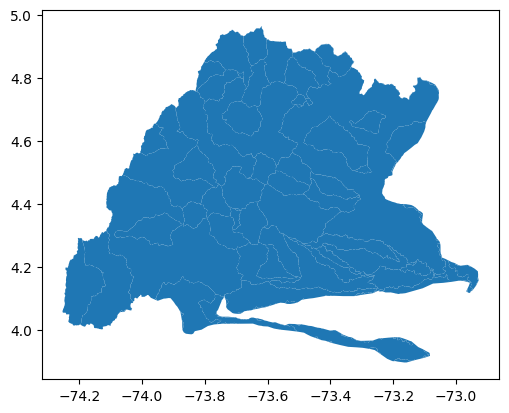

In [74]:
AEsc2.plot()

<Axes: >

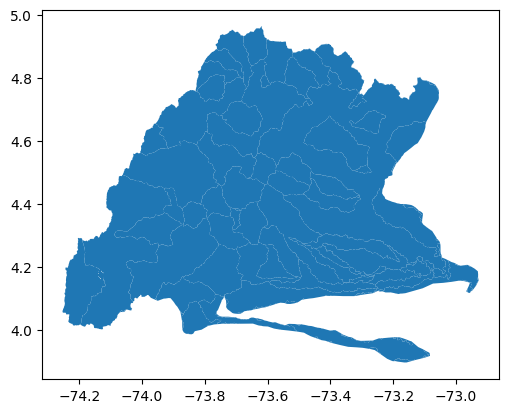

In [77]:
if AE.crs != sc3.crs:
    sc3 = sc3.to_crs(AE.crs)

AEsc3 = gpd.clip(sc3, AE)

AEsc3.plot()

<Axes: >

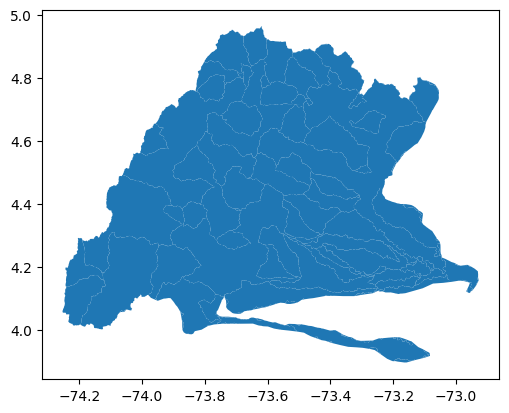

In [78]:
if AE.crs != sc4.crs:
    sc4 = sc4.to_crs(AE.crs)

AEsc4 = gpd.clip(sc4, AE)

AEsc4.plot()

<Axes: >

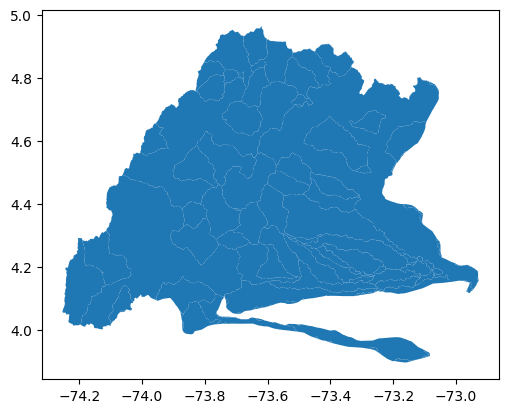

In [79]:
if AE.crs != sc5.crs:
    sc5 = sc5.to_crs(AE.crs)

AEsc5 = gpd.clip(sc5, AE)

AEsc5.plot()